In [28]:
import numpy as np
import grape_edu as utils
from scipy.linalg import expm
import matplotlib.pyplot as plt
import copy
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.signal import savgol_filter

In [ ]:
print(utarg)
uu = np.asarray([[-0.70681589-0.00105485j,  0.00105865+0.70665704j],
 [ 0.00107041+0.70753231j, -0.70742549-0.00107413j]])
print(uu)
print(utils.prod(uu,utils.dagger(uu)))

In [71]:
nions=1
max_amp = 2 * np.pi * 100e3  
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,1/300)
utarg = expm(-1j * (np.pi ) * sx[0] / 2) 
deltaz = [2*np.pi*0]

nsegments = 30
del_t = 1e-6
# x0 = np.random.rand(nsegments*2);
x0 = savgol_filter(result.x, 10, 3)
# x2 = np.load('x120s_optimized.npy'); 
# x0 = utils.smooth_pulse(x2,60,2)
# x0 = np.load('x120s_optimized.npy'); 

rfi=[1]
print(utils.calc_fidelity_ed(x0, nsegments, rfi, ssx, ssy, sz[0], utarg, del_t, nions, max_amp, deltaz))
bnd = Bounds(lb=-np.ones(nsegments*2),ub=np.ones(nsegments*2))
result = minimize(utils.calc_fidelity_ed,
         x0=x0,
         jac=utils.calc_grad_eg,
         args = (nsegments, rfi, ssx, ssy, sz[0], utarg, del_t, nions, max_amp, deltaz),
         method='L-BFGS-B',
         options={'disp':True, 'gtol':1e-16 },
         bounds=bnd,
        )

print(f"Infidelity = {result.fun} pptt")

13.014138701432643
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           60     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.30141D+01    |proj g|=  5.05073D-04

At iterate    1    f=  1.18109D+01    |proj g|=  4.81305D-04

At iterate    2    f=  6.77881D-02    |proj g|=  3.03185D-05

At iterate    3    f=  7.73205D-03    |proj g|=  1.14907D-05

At iterate    4    f=  3.52739D-04    |proj g|=  2.24128D-06

At iterate    5    f=  2.04071D-05    |proj g|=  5.47653D-07

At iterate    6    f=  1.00233D-06    |proj g|=  1.19472D-07

At iterate    7    f=  1.33715D-08    |proj g|=  1.34141D-08
Infidelity = 3.3306690738754696e-12 pptt

At iterate    8    f=  2.99760D-11    |proj g|=  6.15602D-10

At iterate    9    f=  3.33067D-12    |proj g|=  2.72773D-12

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauch

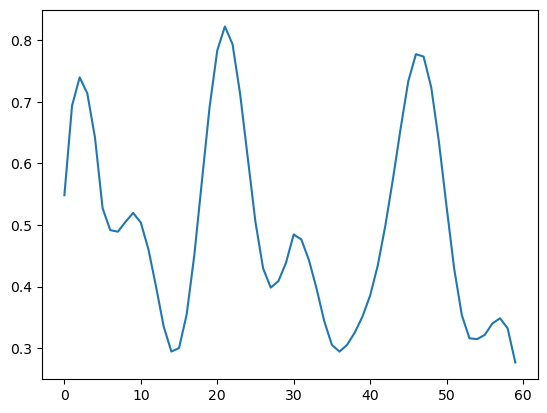

In [42]:
plt.plot(result.x)


In [74]:
print(utils.calc_fidelity_ed(result.x, nsegments, rfi, ssx, ssy, sz[0], utarg, del_t, nions, max_amp, 2*np.pi*200))

0.1221041083654395


Text(0, 0.5, 'Sample/bin')

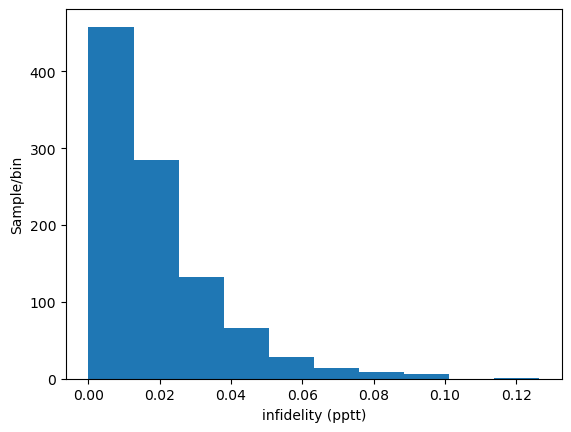

In [75]:
infid =[]
for _ in range(1000):
    infid.append(utils.calc_fidelity_ed_noisy(result.x, nsegments, rfi, ssx, ssy, sz[0], utarg, del_t, nions, max_amp))

plt.hist(infid)
plt.xlabel("infidelity (pptt)")
plt.ylabel("Sample/bin")

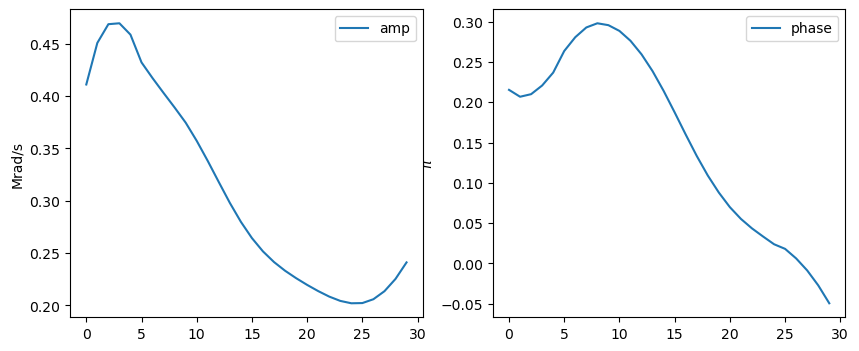

In [72]:
ux = result.x[0:nsegments] * max_amp / np.sqrt(2)
uy = result.x[nsegments:] * max_amp / np.sqrt(2)
amp = np.sqrt(ux**2 + uy**2)/1e6
phase = np.arctan(uy/ux)/np.pi
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(amp,label='amp')
plt.ylabel('Mrad/s')
plt.legend()
plt.subplot(1,2,2)
plt.plot(phase,label='phase')
plt.ylabel(r'$\pi$')
plt.legend()

In [6]:
phase

array([ 0.38130908,  0.26926521,  0.19406168,  0.1357906 ,  0.13679298,
        0.11612482,  0.22748624,  0.29025715,  0.03077787,  0.0384169 ,
        0.15166848,  0.3371455 , -0.48398488,  0.28669441,  0.31559635,
        0.37460721,  0.23402575,  0.38100889,  0.45095534,  0.26496982,
        0.26285245,  0.18039493,  0.13147788,  0.2790549 ,  0.32031183,
        0.07181953,  0.06378351,  0.25947364,  0.22195621,  0.45470488])

In [7]:
amp_phase = np.asarray([amp,phase]).transpose()
np.save('pulse',amp_phase)

In [136]:
def rz(theta):
    return expm(-1j*theta*sz[0]/2)

In [211]:
800*500e-6

0.4

[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]
[[ 0.03207388+6.93889390e-17j -0.12458962-1.24589614e-01j]
 [-0.12458962+1.24589614e-01j  0.96792612+6.80011603e-16j]]
0.9998862288061663


-0.0005394654051618839

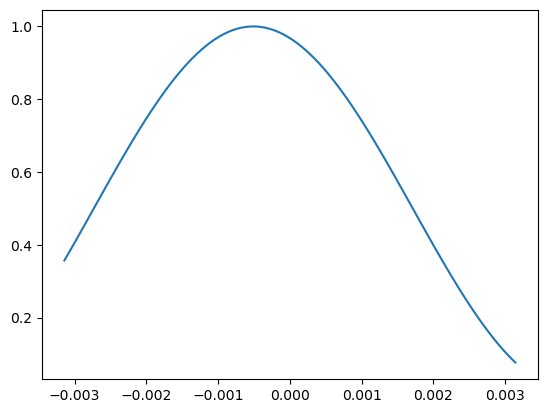

In [234]:
H1 = (np.pi/2)*ssx/2
H2 = 4e-4*(np.pi//2)*sz[0]/2
Up = expm(-1j*(H1+H2))
Um = expm(1j*(H1-H2))
U1 = expm(-1j*(H1))
# U2 = expm(-1j*(H2)*t)
# U12 = U1*U2
# # print(f"Up = {Up} ,\nU1 = {U1},\nU2 = {U2},\nU12 = {U12} ")
# np.abs(np.trace(utils.prod(Up,utils.dagger(U12))))/2

rho0 = np.asarray([[1,0],[0,0]],dtype=complex)
Uy = expm(-1j*(np.pi/2)*ssy/2)

rho1 = utils.prod(Uy,rho0,utils.dagger(Uy))
print(rho1)
for j in range(500):
    rho1 = utils.prod(Um,utils.prod(Up,rho1,utils.dagger(Up)),utils.dagger(Um))


rho2 = utils.prod(Uy,rho1,utils.dagger(Uy))
# abs(np.trace(rho2))
print(rho2)

theta_range = np.linspace(-np.pi/1000,np.pi/1000,100)

p1 = []
for theta in theta_range:
    rp = utils.prod(Uy,rho0,utils.dagger(Uy))
    Up1 = utils.prod(rz(theta),Up)
    Um1 = utils.prod(rz(theta),Um)
    for j in range(500):
        rp = utils.prod(Um1,utils.prod(Up1,rp,utils.dagger(Up1)),utils.dagger(Um1))

    rr = utils.prod(Uy,rp,utils.dagger(Uy))
    p1.append(np.real(rr[1,1]))


plt.plot(theta_range,p1)
print(np.max(p1))
theta_range[p1.index(np.max(p1))]

In [251]:
the = -0.0005394654051618839
Ux = utils.prod(rz(the),Up)
# print(Up)
# print(Ux)
# print(U1)

# print(f"fid of Up with U1 = {np.abs(np.trace(utils.prod(Up,utils.dagger(U1))))/2}")
# print(f"fid of Ux with Up = {np.abs(np.trace(utils.prod(Ux,utils.dagger(Up))))/2}")
# print(f"fid of Uxcorrec with U1 = {np.abs(np.trace(utils.prod(UxCor,utils.dagger(U1))))/2}")
def applygate(gate,state,times):
    for _ in range(times):
        state = utils.prod(gate,state,utils.dagger(gate))
    return state

rho0 = np.asarray([[1/3,np.sqrt(2)/3],[np.sqrt(2)/3,2/3]],dtype=complex)
print(f"ideal:{applygate(U1,rho0,501)}")
print(f"real:{applygate(Up,rho0,501)}")
print(f"corre:{applygate(Ux,rho0,501)}")

ideal:[[0.5       +0.j         0.47140452-0.16666667j]
 [0.47140452+0.16666667j 0.5       +0.j        ]]
real:[[0.50012429-3.60822483e-16j 0.47136205-1.66786703e-01j]
 [0.47136205+1.66786703e-01j 0.49987571-1.94289029e-16j]]
corre:[[0.5001189 -1.66533454e-16j 0.47145196-1.66532397e-01j]
 [0.47145196+1.66532397e-01j 0.4998811 +1.94289029e-16j]]
